# AGAVE
A Graphical Abstract Verification Engine

In [1]:
%load_ext autoreload
%autoreload 2

## Setup

In [2]:
from agave.engine.data_access_layer import CooccurrencyGraph, PaperCache, Metadata

In [3]:
from agave.engine.query_manager import MichaelScott as Manager

In [4]:
graph_db_uri = 'neo4j+s://91bd4f79.databases.neo4j.io'
graph_db_user = 'neo4j'
graph_db_password = 'syc9_tjj2ECTW03hPNtfSN4j6G6Q6lKUUp7YkYP3ALc'
graph_db = CooccurrencyGraph(graph_db_uri, graph_db_user, graph_db_password)

In [5]:
graph_db.test_connection()

Connection established


In [6]:
paper_cache = PaperCache('~/Documents/tesi_local/agave-0/entity_paper.db', '~/Documents/tesi_local/agave-0/bigram_paper.db')

In [7]:
metadata = Metadata('~/Code/CovEffect-data-provision/products/raw/metadata.csv', sample=True)

## Querying

#### Note

- Ho una chain di entities
- paths per ogni coppia di entities
- Per ogni coppia:
    - scelgo un path, prendo i papers
    - metto i papers nel gatherer, mi segno le relazioni, mi segno se contengono quelle della query
- Ordino i paper:
    - Prima quelli che spiegano più della catena originale
    - Secondi quelli che spiegano tanti nodi comunque
    - Gli altri per data e qualità
    

#### 

In [9]:
the_manager = Manager(metadata, paper_cache, graph_db)

In [10]:
chain = ['BRCA1','paracetamol','death','breast cancer']
the_manager.find_single_chain(chain)

In [11]:
the_manager.show_single_chain_result()

BRCA1-->paracetamol
0 ['BRCA1<SEP>patients', 'paracetamol<SEP>patients'] 			 51.5
-------------------------
paracetamol-->death
0 ['paracetamol<SEP>patients', 'death<SEP>patients'] 			 5416.0
1 ['COVID-19<SEP>paracetamol', 'COVID-19<SEP>death'] 			 5141.0
2 ['paracetamol<SEP>patient', 'death<SEP>patient'] 			 1493.0
3 ['drug<SEP>paracetamol', 'death<SEP>drug'] 			 479.5
4 ['children<SEP>paracetamol', 'children<SEP>death'] 			 463.0
5 ['fever<SEP>paracetamol', 'death<SEP>fever'] 			 445.5
6 ['pain<SEP>paracetamol', 'death<SEP>pain'] 			 108.0
-------------------------
death-->breast cancer
0 ['breast cancer<SEP>death'] 			 103.0
-------------------------


In [12]:
the_manager.select_path_single_chain([0,2,0])

BRCA1-->paracetamol
0 ['BRCA1<SEP>patients', 'paracetamol<SEP>patients']
death-->breast cancer
2 ['paracetamol<SEP>patient', 'death<SEP>patient']
BRCA1-->paracetamol
0 ['breast cancer<SEP>death']


In [12]:
#the_manager.stoner.get_selected_path_relations()

In [13]:
the_manager._gather_papers()

In [14]:
the_manager.gatherer.papers

,cord_uid,relation,original,meta_relation
0,l0wc31to,BRCA1<SEP>patients,True,BRCA1-->paracetamol
1,ikstn4yk,BRCA1<SEP>patients,True,BRCA1-->paracetamol
2,bhsw2wv4,BRCA1<SEP>patients,True,BRCA1-->paracetamol
3,57i1jaol,BRCA1<SEP>patients,True,BRCA1-->paracetamol
4,0qewmjn1,BRCA1<SEP>patients,True,BRCA1-->paracetamol
...,...,...,...,...
3182,35z11126,breast cancer<SEP>death,True,death-->breast cancer
3183,817f3rer,breast cancer<SEP>death,True,death-->breast cancer
3184,oduk7qax,breast cancer<SEP>death,True,death-->breast cancer
3185,398je5tr,breast cancer<SEP>death,True,death-->breast cancer


In [15]:
the_manager.gatherer.extracted_papers.head()

,cord_uid,title,abstract,doi,authors,journal,publish_time,occurrences,explained_relations
0,00rezmqj,Intra-arterial administration of a replication...,Both replication-incompetent and replication-s...,10.1038/sj.gt.3301512,"Reid, T; Galanis, E; Abbruzzese, J; Sze, D; An...",Gene Ther,2001-11-22 00:00:00,1,['death<SEP>patient']
1,0nyy7vjo,Tuberculosis mortality: patient characteristic...,"BACKGROUND: In the antibiotic era, tuberculosi...",10.1186/1471-2334-14-5,"Lin, Chou-Han; Lin, Chou-Jui; Kuo, Yao-Wen; Wa...",BMC Infect Dis,2014-01-03 00:00:00,1,['death<SEP>patient']
2,18dxcn41,Demographic profile and outcome analysis of a ...,Objective : To study the profile and outcome o...,10.1007/bf02724117,"Khilnani, Praveen; Sarma, Devajit; Singh, Reet...",Indian J Pediatr,2004-01-01 00:00:00,1,['death<SEP>patient']
3,1vimqhdp,36th International Symposium on Intensive Care...,P001 - Sepsis impairs the capillary response w...,10.1186/s13054-016-1208-6,"Bateman, R. M.; Sharpe, M. D.; Jagger, J. E.; ...",Crit Care,2016-04-20 00:00:00,1,['death<SEP>patient']
4,271vldil,Understanding the clinical spectrum of complic...,The resurgence of the malaria eradication agen...,10.1186/1475-2875-11-12,"Lacerda, Marcus VG; Mourão, Maria PG; Alexandr...",Malar J,2012-01-09 00:00:00,1,['death<SEP>patient']


In [16]:
the_manager.gatherer.get_papers_by_meta_relation('BRCA1-->paracetamol')

,cord_uid,title,abstract,doi,authors,journal,publish_time,occurrences,explained_relations
18,fl14to1o,Faut-il contrôler la fièvre dans les infection...,Temperature control during severe sepsis is cu...,10.1007/s13546-015-1168-x,"Seguin, P.; Launey, Y.; Nesseler, N.; Malledan...",Reanimation,2016-03-11 00:00:00,2,"['paracetamol<SEP>patients', 'paracetamol<SEP>..."


## Querying with Graphical Abstract

In [8]:
the_manager = Manager(metadata, paper_cache, graph_db)

In [35]:
from agave.model.query import GraphicalAbstract
import networkx as nx
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [10]:
g = GraphicalAbstract()

In [11]:
chain = ['BRCA1','paracetamol','death','breast cancer']

In [12]:
g.add_chain(chain)

In [20]:
chain2 = ['BRCA1','fever','death']
g.add_chain(chain2)

In [40]:
print(the_manager.gatherer.get_paper_by_doi('10.1038/sj.gt.3301512').explained_relations)

0    ['death<SEP>patient', 'fever<SEP>patients', 'death<SEP>fever']
Name: explained_relations, dtype: object


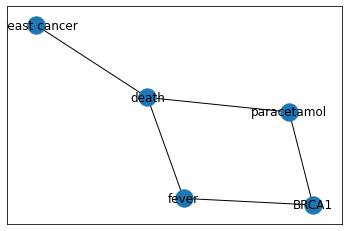

In [21]:
nx.draw_networkx(g.graph)

In [22]:
the_manager.find_graphical_abstract(g)

In [23]:
the_manager.show_single_chain_result()

BRCA1-->fever
0 ['BRCA1<SEP>patients', 'fever<SEP>patients'] 			 2832.5
1 ['BRCA1<SEP>cancer', 'cancer<SEP>fever'] 			 125.0
2 ['BRCA1<SEP>genetic', 'fever<SEP>genetic'] 			 80.0
3 ['BRCA1<SEP>genes', 'fever<SEP>genes'] 			 48.0
4 ['BRCA1<SEP>breast cancer', 'breast cancer<SEP>fever'] 			 20.0
-------------------------
fever-->death
0 ['death<SEP>fever'] 			 854.0
-------------------------


In [24]:
the_manager.select_path_single_chain([0,0])

BRCA1-->fever
0 ['BRCA1<SEP>patients', 'fever<SEP>patients']
BRCA1-->fever
0 ['death<SEP>fever']


In [25]:
the_manager._gather_papers()

In [28]:
the_manager.gatherer.extracted_papers.head()

,cord_uid,title,abstract,doi,authors,journal,publish_time,occurrences,explained_relations
0,00rezmqj,Intra-arterial administration of a replication...,Both replication-incompetent and replication-s...,10.1038/sj.gt.3301512,"Reid, T; Galanis, E; Abbruzzese, J; Sze, D; An...",Gene Ther,2001-11-22 00:00:00,3,"['death<SEP>patient', 'fever<SEP>patients', 'd..."
1,03kqeed3,Clinical features of the 2009 swine-origin inf...,To clarify the clinical symptoms of the influe...,10.1007/s10156-010-0187-9,"Takayama, Koji; Kuramochi, Jin; Oinuma, Takesh...",J Infect Chemother,2010-12-21 00:00:00,1,['fever<SEP>patients']
2,09glfcww,Multiple organ failure and coma as initial pre...,The unusual case of a 65-year-old woman with i...,10.1007/bf01694777,"Lorz, W.; Cottier, Chr; Imhof, E.; Gyr, N.",Intensive Care Med,1993-01-01 00:00:00,1,['fever<SEP>patients']
3,0h2wvv40,Vancomycin-resistant Enterococcus faecium pneu...,BACKGROUND: Even though enterococci can cause ...,10.1186/s12879-020-4892-4,"Li, Fengqin; Wang, Yonglan; Sun, Linlin; Wang,...",BMC Infect Dis,2020-02-22 00:00:00,1,['fever<SEP>patients']
4,0nyy7vjo,Tuberculosis mortality: patient characteristic...,"BACKGROUND: In the antibiotic era, tuberculosi...",10.1186/1471-2334-14-5,"Lin, Chou-Han; Lin, Chou-Jui; Kuo, Yao-Wen; Wa...",BMC Infect Dis,2014-01-03 00:00:00,1,['death<SEP>patient']


In [39]:
print(the_manager.gatherer.get_paper_by_doi('10.1038/sj.gt.3301512').explained_relations)

0    ['death<SEP>patient', 'fever<SEP>patients', 'death<SEP>fever']
Name: explained_relations, dtype: object


In [27]:
the_manager.gatherer.get_papers_by_meta_relation('BRCA1-->fever')

,cord_uid,title,abstract,doi,authors,journal,publish_time,occurrences,explained_relations
0,00rezmqj,Intra-arterial administration of a replication...,Both replication-incompetent and replication-s...,10.1038/sj.gt.3301512,"Reid, T; Galanis, E; Abbruzzese, J; Sze, D; An...",Gene Ther,2001-11-22 00:00:00,3,"['death<SEP>patient', 'fever<SEP>patients', 'd..."
1,03kqeed3,Clinical features of the 2009 swine-origin inf...,To clarify the clinical symptoms of the influe...,10.1007/s10156-010-0187-9,"Takayama, Koji; Kuramochi, Jin; Oinuma, Takesh...",J Infect Chemother,2010-12-21 00:00:00,1,['fever<SEP>patients']
2,09glfcww,Multiple organ failure and coma as initial pre...,The unusual case of a 65-year-old woman with i...,10.1007/bf01694777,"Lorz, W.; Cottier, Chr; Imhof, E.; Gyr, N.",Intensive Care Med,1993-01-01 00:00:00,1,['fever<SEP>patients']
3,0h2wvv40,Vancomycin-resistant Enterococcus faecium pneu...,BACKGROUND: Even though enterococci can cause ...,10.1186/s12879-020-4892-4,"Li, Fengqin; Wang, Yonglan; Sun, Linlin; Wang,...",BMC Infect Dis,2020-02-22 00:00:00,1,['fever<SEP>patients']
6,1br7nhzt,A Combined Syndromic Approach to Examine Viral...,The use of fever syndromic surveillance in sub...,10.4269/ajtmh.17-0421,"Hercik, Christine; Cosmas, Leonard; Mogeni, On...",Am J Trop Med Hyg,2017-12-26 00:00:00,1,['fever<SEP>patients']
...,...,...,...,...,...,...,...,...,...
113,z51l0fiq,Clinical characteristics of liver failure with...,Liver failure with hemophagocytic lymphohistio...,10.1038/s41598-019-43909-w,"Dong, Jinling; Xie, Fang; Jia, Lin; Li, Juan; ...",Sci Rep,2019-05-31 00:00:00,1,['fever<SEP>patients']
114,z8n220wv,G-CSF mobilised granulocyte transfusions in 32...,"INTRODUCTION: In this retrospective, uncontrol...",10.1007/s00520-006-0041-x,"Grigull, Lorenz; Pulver, Nicole; Goudeva, Lili...",Support Care Cancer,2006-04-19 00:00:00,1,['fever<SEP>patients']
115,z9kk5xd4,Prevalence and associated factors of pediatric...,BACKGROUND: Childhood mortality remains high i...,10.1186/s12887-018-1287-4,"Jofiro, Gemechu; Jemal, Kemal; Beza, Lemlem; B...",BMC Pediatr,2018-10-02 00:00:00,2,"['fever<SEP>patients', 'death<SEP>fever']"
116,zfz98etw,Prevalence and Correlation of Infectious Agent...,Acute respiratory tract infections (ARTIs) are...,10.1371/journal.pone.0119170,"Liu, Jia; Ai, Hongwu; Xiong, Ying; Li, Fu; Wen...",PLoS One,2015-03-09 00:00:00,1,['fever<SEP>patients']
